In [17]:
import os
import datetime as dt
from time import sleep

import numpy as np
import pandas as pd
from matplotlib.dates import HourLocator, DateFormatter, MinuteLocator
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15,5)

In [2]:
base_path = os.path.dirname(os.path.abspath('..'))
data_path = os.path.join(base_path, 'data')
stock_path = os.path.join(data_path, 'stock')
folder_path = os.path.join(stock_path, 'folder')
minute_path = os.path.join(folder_path, '분별매매가격_가상화폐')

In [26]:
code_list = ['121800','041190', '100790']

# 1. 데이터

In [27]:
data = {}
for code in code_list:
    code_path = os.path.join(minute_path, code)
    files = os.listdir(code_path)
    data[code.split('.')[0]] = {}
    
    for file in files:
        file_path = os.path.join(code_path, file)
        df = pd.read_csv(file_path, engine='python')
        df['기준가'] = df.iloc[0]['체결가'] - df.iloc[0]['전일비']
        df['기준가비교'] = df['체결가'] - df['기준가']
        df['기준가비율'] = df['기준가비교'] / df['기준가']
        df['체결시각'] = pd.to_datetime(df['체결시각'])
        df['이전체결가'] = df['체결가'].shift(1)
        df['체결가-이전체결가'] = df['체결가'] - df['이전체결가']
        df['7분이동평균'] = df['체결가'].rolling(window=7).mean()
        df['7분-이전이동평균'] = df['7분이동평균'] - df['7분이동평균'].shift(1)
        df.set_index('체결시각', inplace=True)
        data[code.split('.')[0]][file.split('.')[0]] = df.copy()

In [28]:
name_dict = {}
for code in code_list:
    name_dict[code]= None

In [29]:
name_dict['121800'] = '비덴트'
name_dict['041190'] = '우리기술투자'
name_dict['100790'] = '미래에셋벤처투자'

# 2. 일별흐름

In [30]:
days = ['0401', '0402', '0403', '0404', '0405', '0408']
days_index = ['04-01', '04-02', '04-03', '04-04', '04-05', '04-08']

### 1.비덴트

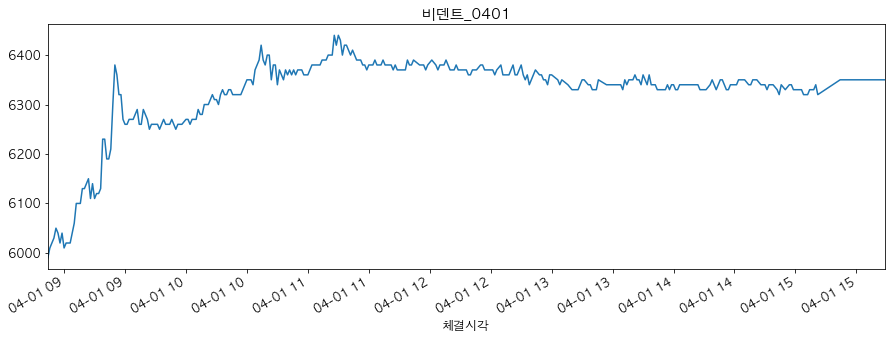

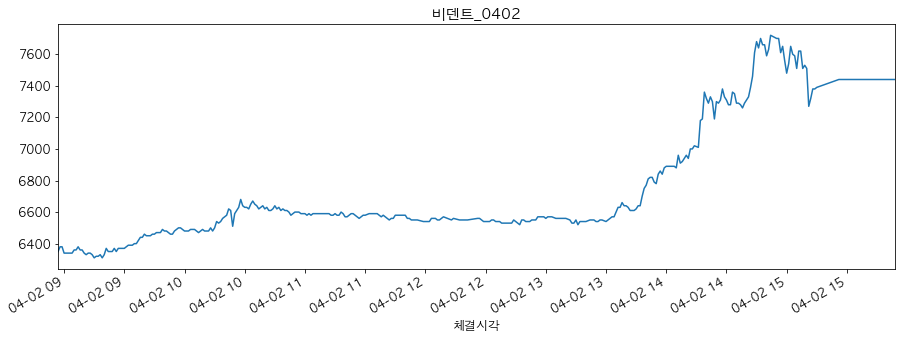

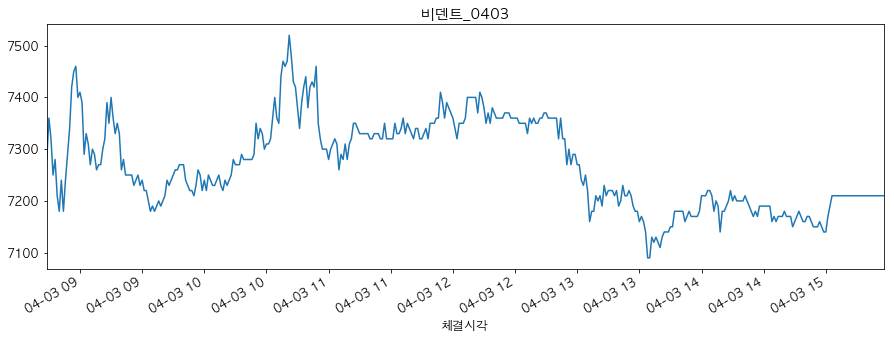

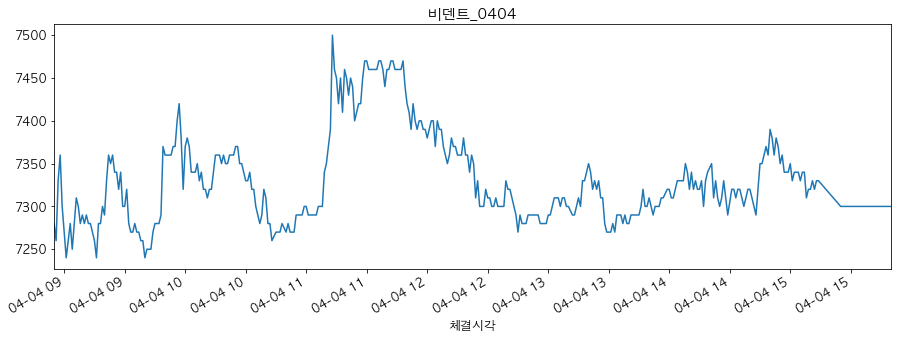

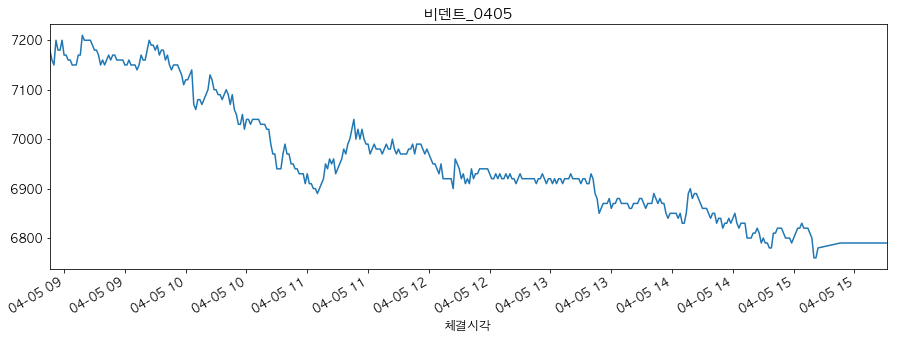

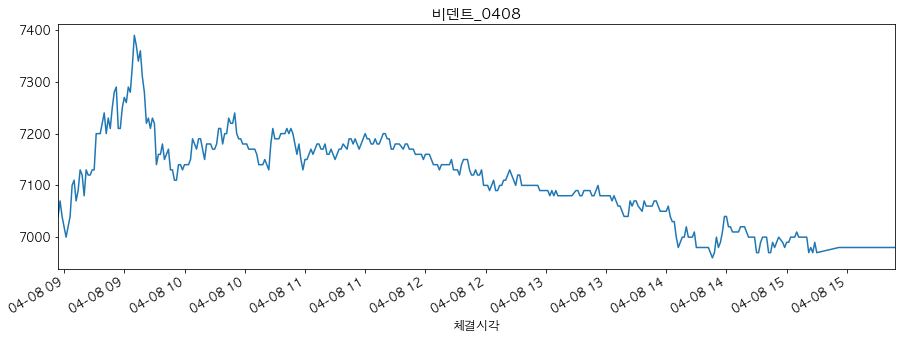

In [24]:
code = code_list[0]
for i, day in enumerate(days):
    start_time = pd.to_datetime('2019-'+days_index[i]+' 09:00:00')
    end_time = pd.to_datetime('2019-'+days_index[i]+ ' 16:30:00')
    ax = data[code][day]['체결가'][start_time: end_time].plot()
    ax.xaxis.set_major_locator(MinuteLocator(interval=30))
    #ax.xaxis.set_major_formatter(DateFormatter('%M'))
    plt.title(name_dict[code] + "_" + day)
    plt.savefig('./result/' + name_dict[code] + "_" + day + ".png")
    plt.show()
    del ax
    sleep(0.5)

### 2. 우리기술투자

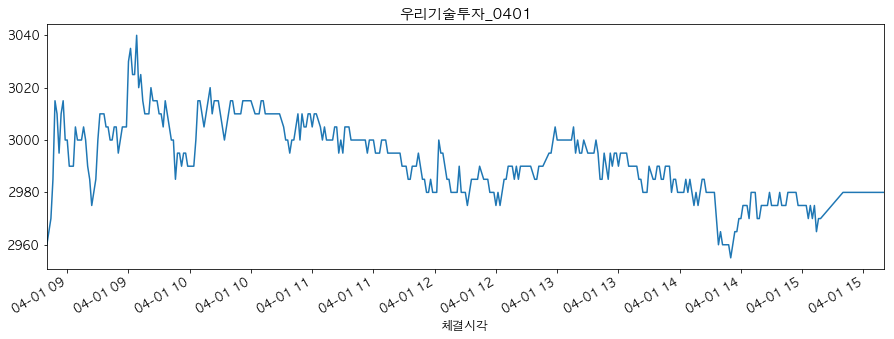

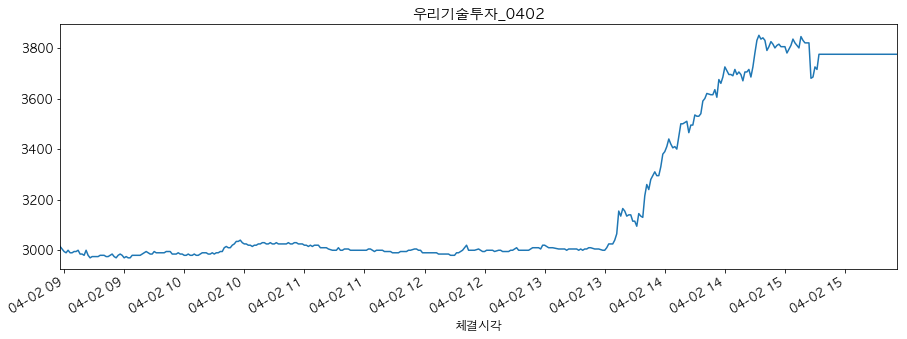

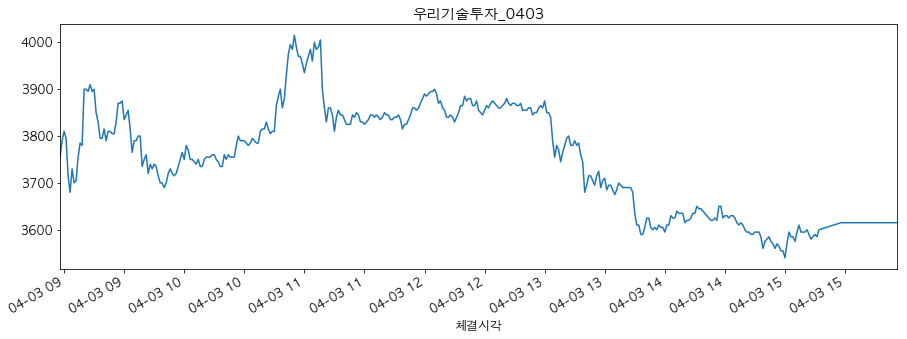

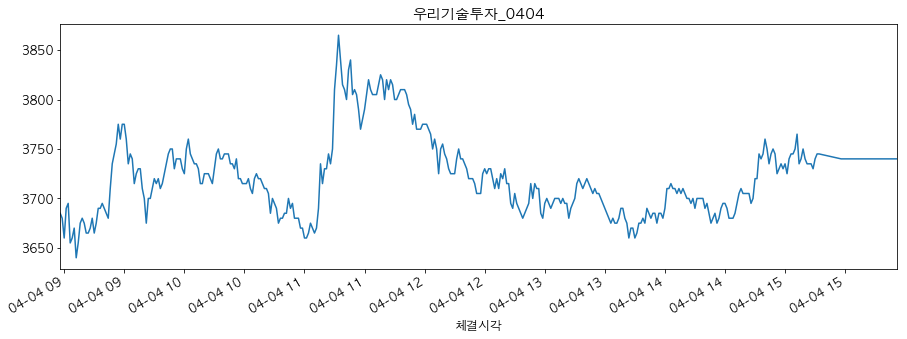

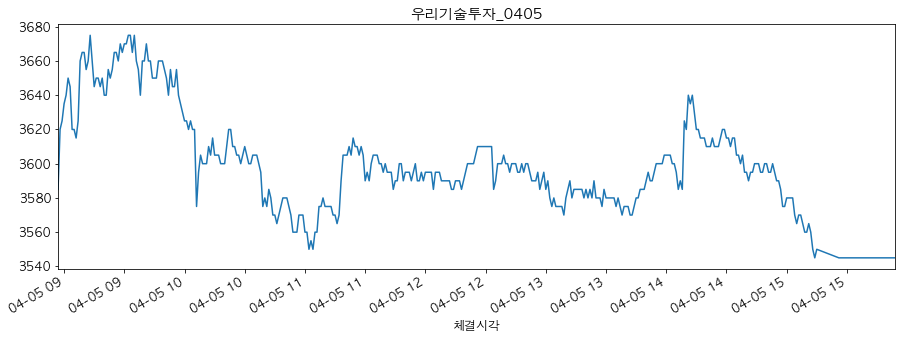

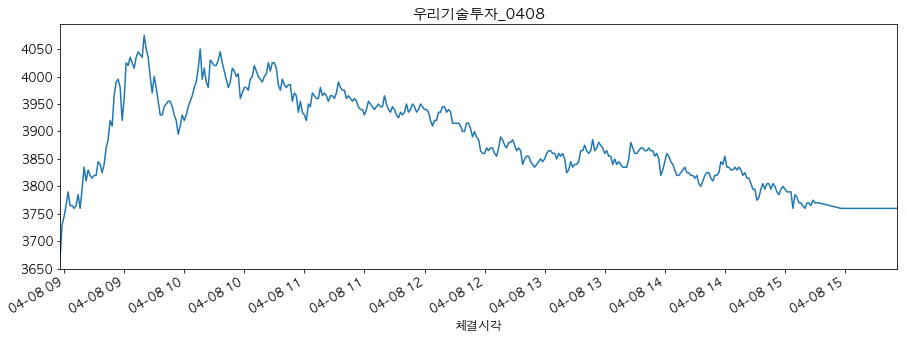

In [25]:
code = code_list[1]
for i, day in enumerate(days):
    start_time = pd.to_datetime('2019-'+days_index[i]+' 09:00:00')
    end_time = pd.to_datetime('2019-'+days_index[i]+ ' 16:30:00')
    ax = data[code][day]['체결가'][start_time: end_time].plot()
    ax.xaxis.set_major_locator(MinuteLocator(interval=30))
    #ax.xaxis.set_major_formatter(DateFormatter('%M'))
    plt.title(name_dict[code] + "_" + day)
    plt.savefig('./result/' + name_dict[code] + "_" + day + ".png")
    plt.show()
    del ax
    sleep(0.5)

### 3. 미래에셋 벤처투자

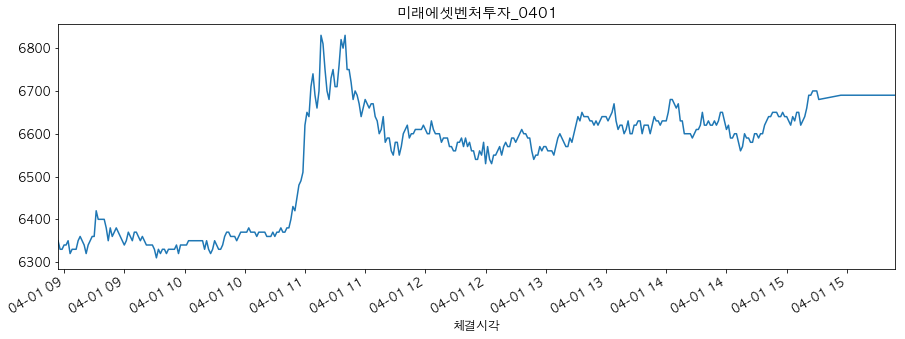

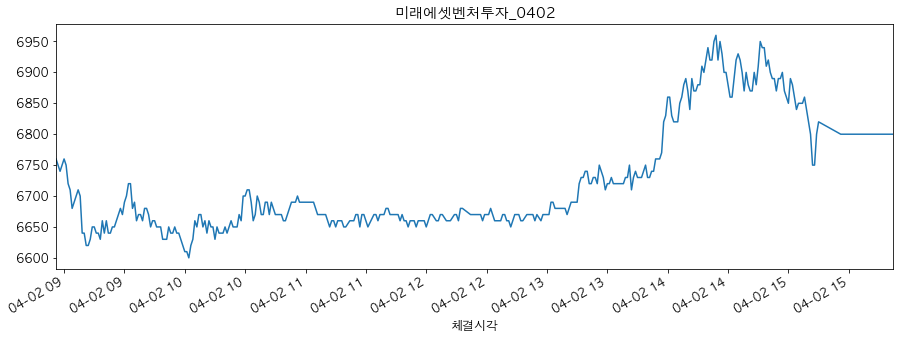

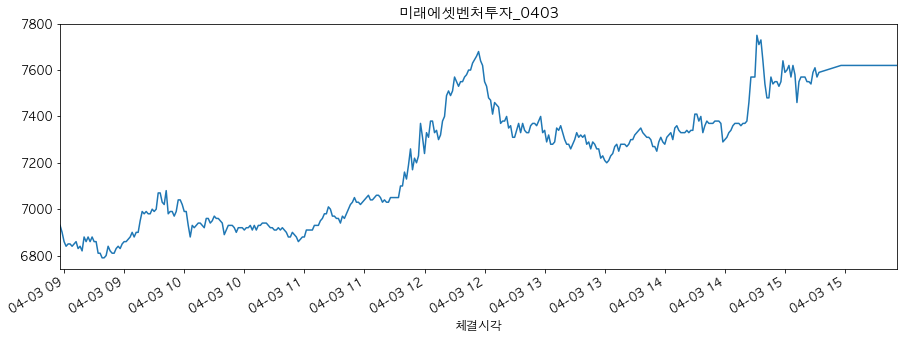

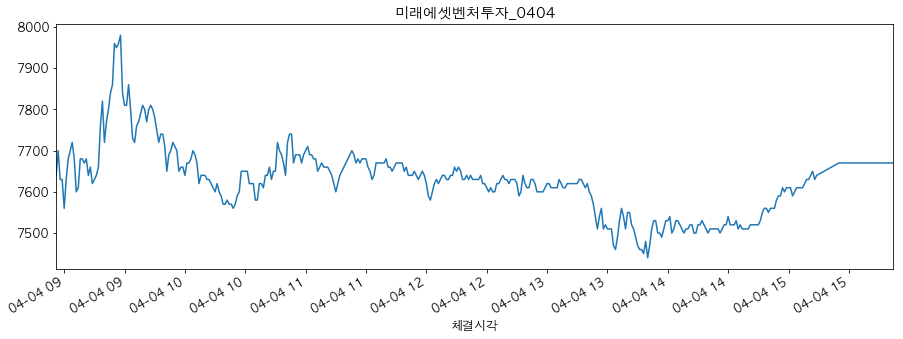

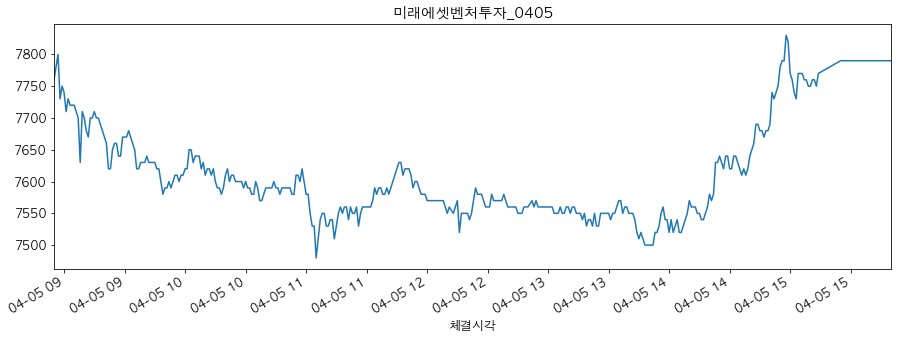

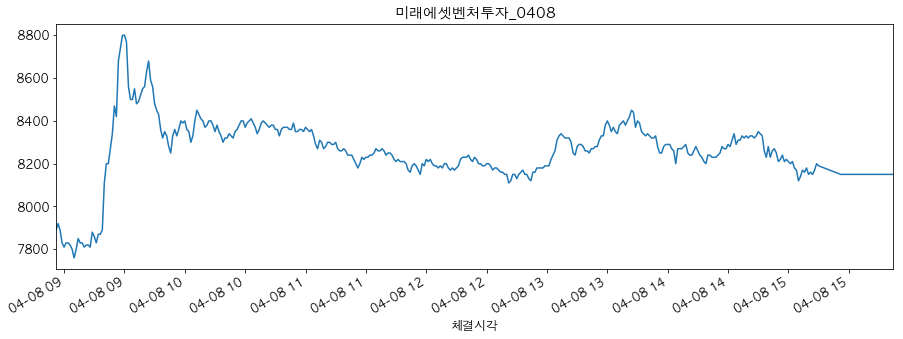

In [31]:
code = code_list[2]
for i, day in enumerate(days):
    start_time = pd.to_datetime('2019-'+days_index[i]+' 09:00:00')
    end_time = pd.to_datetime('2019-'+days_index[i]+ ' 16:30:00')
    ax = data[code][day]['체결가'][start_time: end_time].plot()
    ax.xaxis.set_major_locator(MinuteLocator(interval=30))
    #ax.xaxis.set_major_formatter(DateFormatter('%M'))
    plt.title(name_dict[code] + "_" + day)
    plt.savefig('./result/' + name_dict[code] + "_" + day + ".png")
    plt.show()
    del ax
    sleep(0.5)